# Import

In [38]:
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from google.colab.patches import cv2_imshow

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device 

device(type='cuda')

# Configuration

In [3]:
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
input_size = 784
n_classes = 10
learning_rate = .001
batch_size = 64
n_epochs = 50

# Cifar-10

In [6]:
train_dataset_cifar10 = datasets.CIFAR10(root='/content/cifar10', train=True, transform = transforms.ToTensor(), download = True)
train_loader_cifar10 = DataLoader(dataset=train_dataset_cifar10, batch_size=batch_size, shuffle=True)
train_dataset_cifar10

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/cifar10
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_dataset_cifar10 = datasets.CIFAR10(root='/content/cifar10', train=False, transform = transforms.ToTensor(), download = True)
test_loader_cifar10 = DataLoader(dataset=test_dataset_cifar10, batch_size=batch_size, shuffle=False)
test_dataset_cifar10

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/cifar10
    Split: Test
    StandardTransform
Transform: ToTensor()

9


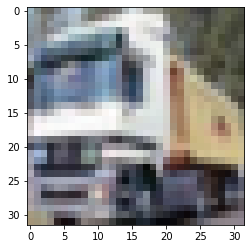

In [8]:
image, label = train_dataset_cifar10[1]
print(label)
plt.imshow(image.permute(1, 2, 0))

# FashionMNIST data

In [14]:
train_dataset_fashion = datasets.FashionMNIST(root='/content/fashionMNIST', train=True, transform = transforms.ToTensor(), download = True)
train_loader_fashion = DataLoader(dataset=train_dataset_fashion, batch_size=batch_size, shuffle=True)
train_dataset_fashion

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/fashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/fashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/fashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/fashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/fashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/fashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/fashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/fashionMNIST/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content/fashionMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [15]:
test_dataset_fashion = datasets.FashionMNIST(root='/content/fashionMNIST', train=False, transform = transforms.ToTensor(), download = True)
test_loader_fashion = DataLoader(dataset=test_dataset_fashion, batch_size=batch_size, shuffle=False)
test_dataset_fashion

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /content/fashionMNIST
    Split: Test
    StandardTransform
Transform: ToTensor()

9


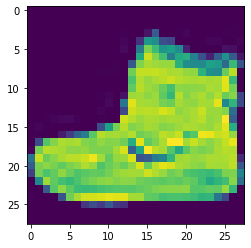

In [ ]:
image, label = train_dataset_fashion[0]
print(label)
plt.imshow(image.squeeze())

# MLP model

In [20]:
class MLP(nn.Module):
    def __init__(self, input_size, n_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 25),
            nn.ReLU(),
            nn.Linear(25, n_classes),
            nn.Softmax(dim=1)
        )
    def forward(self, X):
        prob = self.model(X)
        return prob

In [21]:
model = MLP(input_size=input_size, n_classes=n_classes).to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=25, bias=True)
    (5): ReLU()
    (6): Linear(in_features=25, out_features=10, bias=True)
    (7): Softmax(dim=1)
  )
)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## Fashion

In [23]:
for epoch in range(n_epochs + 1):
    for batch_idx, (data, targets) in enumerate(train_loader_fashion):
        data = data.to(device)
        targets = targets.to(device)

        data = data.reshape(data.shape[0], -1)

        # forward pass
        scores = model(data)
        loss = criterion(scores, targets)
        
        # backward pass
        optimizer.zero_grad() # Empty optimizer
        loss.backward()       # Calculate loss gradient

        # optimizer executed
        optimizer.step()
    print(f'Epoch: {epoch}/{n_epochs}, Batch: {batch_idx + 1}, Loss: {loss.item():.2f}')

Epoch: 0/50, Batch: 938, Loss: 1.76
Epoch: 1/50, Batch: 938, Loss: 1.74
Epoch: 2/50, Batch: 938, Loss: 1.53
Epoch: 3/50, Batch: 938, Loss: 1.65
Epoch: 4/50, Batch: 938, Loss: 1.63
Epoch: 5/50, Batch: 938, Loss: 1.73
Epoch: 6/50, Batch: 938, Loss: 1.60
Epoch: 7/50, Batch: 938, Loss: 1.63
Epoch: 8/50, Batch: 938, Loss: 1.51
Epoch: 9/50, Batch: 938, Loss: 1.64
Epoch: 10/50, Batch: 938, Loss: 1.52
Epoch: 11/50, Batch: 938, Loss: 1.61
Epoch: 12/50, Batch: 938, Loss: 1.49
Epoch: 13/50, Batch: 938, Loss: 1.59
Epoch: 14/50, Batch: 938, Loss: 1.68
Epoch: 15/50, Batch: 938, Loss: 1.65
Epoch: 16/50, Batch: 938, Loss: 1.66
Epoch: 17/50, Batch: 938, Loss: 1.56
Epoch: 18/50, Batch: 938, Loss: 1.62
Epoch: 19/50, Batch: 938, Loss: 1.63
Epoch: 20/50, Batch: 938, Loss: 1.49
Epoch: 21/50, Batch: 938, Loss: 1.53
Epoch: 22/50, Batch: 938, Loss: 1.49
Epoch: 23/50, Batch: 938, Loss: 1.53
Epoch: 24/50, Batch: 938, Loss: 1.62
Epoch: 25/50, Batch: 938, Loss: 1.53
Epoch: 26/50, Batch: 938, Loss: 1.56
Epoch: 27/5

In [24]:
def get_accuracy(loader, model):
    if loader.dataset.train:
        print('====> Getting accuracy on training data....')
    else:
        print('====> Getting accuracy on test data....')
    
    n_corrects = 0
    n_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)

            # forward
            scores = model(x)
            _, y_pred = scores.max(1)
            n_corrects += (y_pred == y).sum()
            n_samples += y_pred.size(0)
        print(f'Number of corrects: {n_corrects}/{n_samples}\nAccuracy: {float(n_corrects)/float(n_samples)*100.0:.2f}')
    model.train()

In [25]:
get_accuracy(train_loader_fashion, model)
get_accuracy(test_loader_fashion, model)

====> Getting accuracy on training data....
Number of corrects: 53523/60000
Accuracy: 89.20
====> Getting accuracy on test data....
Number of corrects: 8641/10000
Accuracy: 86.41


## Cifar-10

In [26]:
model = MLP(input_size=3*32*32, n_classes=n_classes).to(device)
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=3072, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=25, bias=True)
    (5): ReLU()
    (6): Linear(in_features=25, out_features=10, bias=True)
    (7): Softmax(dim=1)
  )
)

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [29]:
for epoch in range(n_epochs + 1):
    for batch_idx, (data, targets) in enumerate(train_loader_cifar10):
        data = data.to(device)
        targets = targets.to(device)

        data = data.reshape(data.shape[0], -1)

        # forward pass
        scores = model(data)
        loss = criterion(scores, targets)
        
        # backward pass
        optimizer.zero_grad() # Empty optimizer
        loss.backward()       # Calculate loss gradient

        # optimizer executed
        optimizer.step()
    print(f'Epoch: {epoch}/{n_epochs}, Batch: {batch_idx + 1}, Loss: {loss.item():.2f}')

Epoch: 0/50, Batch: 782, Loss: 2.30
Epoch: 1/50, Batch: 782, Loss: 2.07
Epoch: 2/50, Batch: 782, Loss: 2.14
Epoch: 3/50, Batch: 782, Loss: 2.00
Epoch: 4/50, Batch: 782, Loss: 2.13
Epoch: 5/50, Batch: 782, Loss: 2.03
Epoch: 6/50, Batch: 782, Loss: 2.06
Epoch: 7/50, Batch: 782, Loss: 1.98
Epoch: 8/50, Batch: 782, Loss: 2.09
Epoch: 9/50, Batch: 782, Loss: 2.03
Epoch: 10/50, Batch: 782, Loss: 1.98
Epoch: 11/50, Batch: 782, Loss: 2.20
Epoch: 12/50, Batch: 782, Loss: 1.76
Epoch: 13/50, Batch: 782, Loss: 2.15
Epoch: 14/50, Batch: 782, Loss: 1.96
Epoch: 15/50, Batch: 782, Loss: 1.95
Epoch: 16/50, Batch: 782, Loss: 1.91
Epoch: 17/50, Batch: 782, Loss: 2.15
Epoch: 18/50, Batch: 782, Loss: 1.92
Epoch: 19/50, Batch: 782, Loss: 1.95
Epoch: 20/50, Batch: 782, Loss: 2.07
Epoch: 21/50, Batch: 782, Loss: 1.91
Epoch: 22/50, Batch: 782, Loss: 1.96
Epoch: 23/50, Batch: 782, Loss: 2.03
Epoch: 24/50, Batch: 782, Loss: 2.08
Epoch: 25/50, Batch: 782, Loss: 2.01
Epoch: 26/50, Batch: 782, Loss: 2.00
Epoch: 27/5

In [31]:
def get_accuracy(loader, model):
    if loader.dataset.train:
        print('====> Getting accuracy on training data....')
    else:
        print('====> Getting accuracy on test data....')
    
    n_corrects = 0
    n_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            x = x.reshape(x.shape[0], -1)
            
            # forward
            scores = model(x)
            _, y_pred = scores.max(1)
            n_corrects += (y_pred == y).sum()
            n_samples += y_pred.size(0)
        print(f'Number of corrects: {n_corrects}/{n_samples}\nAccuracy: {float(n_corrects)/float(n_samples)*100.0:.2f}')
    model.train()

In [32]:
get_accuracy(train_loader_cifar10, model)
get_accuracy(test_loader_cifar10, model)

====> Getting accuracy on training data....
Number of corrects: 25435/50000
Accuracy: 50.87
====> Getting accuracy on test data....
Number of corrects: 4637/10000
Accuracy: 46.37


# LeNet-5

## Fashion

In [89]:
class LeNet(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.ELU(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.ELU(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.ELU(),
            nn.Flatten(),
            nn.Linear(in_features=120, out_features=84),
            nn.ELU(),
            nn.Linear(in_features=84, out_features=n_classes),
            nn.Softmax(dim=1)
        )
    
    def forward(self, X):
        prob = self.model(X)
        return prob

In [90]:
train_dataset_fashion = datasets.FashionMNIST(root='/content/fashionMNIST', train=True, transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()]), download = True)
train_loader_fashion = DataLoader(dataset=train_dataset_fashion, batch_size=batch_size, shuffle=True)
test_dataset_fashion = datasets.FashionMNIST(root='/content/fashionMNIST', train=False, transform = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()]), download = True)
test_loader_fashion = DataLoader(dataset=test_dataset_fashion, batch_size=batch_size, shuffle=False)
train_dataset_fashion, test_dataset_fashion

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: /content/fashionMNIST
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: /content/fashionMNIST
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ))

In [91]:
model = LeNet(n_classes=n_classes).to(device)
model

LeNet(
  (model): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ELU(alpha=1.0)
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ELU(alpha=1.0)
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): ELU(alpha=1.0)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ELU(alpha=1.0)
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)

In [92]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [93]:
for epoch in range(n_epochs + 1):
    for batch_idx, (data, targets) in enumerate(train_loader_fashion):

        data = data.to(device)
        targets = targets.to(device)

        # forward pass
        scores = model(data)
        loss = criterion(scores, targets)
        
        # backward pass
        optimizer.zero_grad() # Empty optimizer
        loss.backward()       # Calculate loss gradient

        # optimizer executed
        optimizer.step()
    print(f'Epoch: {epoch}/{n_epochs}, Batch: {batch_idx + 1}, Loss: {loss.item():.2f}')

Epoch: 0/50, Batch: 938, Loss: 1.65
Epoch: 1/50, Batch: 938, Loss: 1.60
Epoch: 2/50, Batch: 938, Loss: 1.70
Epoch: 3/50, Batch: 938, Loss: 1.56
Epoch: 4/50, Batch: 938, Loss: 1.66
Epoch: 5/50, Batch: 938, Loss: 1.56
Epoch: 6/50, Batch: 938, Loss: 1.60
Epoch: 7/50, Batch: 938, Loss: 1.49
Epoch: 8/50, Batch: 938, Loss: 1.65
Epoch: 9/50, Batch: 938, Loss: 1.56
Epoch: 10/50, Batch: 938, Loss: 1.62
Epoch: 11/50, Batch: 938, Loss: 1.60
Epoch: 12/50, Batch: 938, Loss: 1.55
Epoch: 13/50, Batch: 938, Loss: 1.56
Epoch: 14/50, Batch: 938, Loss: 1.65
Epoch: 15/50, Batch: 938, Loss: 1.59
Epoch: 16/50, Batch: 938, Loss: 1.58
Epoch: 17/50, Batch: 938, Loss: 1.62
Epoch: 18/50, Batch: 938, Loss: 1.54
Epoch: 19/50, Batch: 938, Loss: 1.62
Epoch: 20/50, Batch: 938, Loss: 1.68
Epoch: 21/50, Batch: 938, Loss: 1.52
Epoch: 22/50, Batch: 938, Loss: 1.67
Epoch: 23/50, Batch: 938, Loss: 1.49
Epoch: 24/50, Batch: 938, Loss: 1.53
Epoch: 25/50, Batch: 938, Loss: 1.49
Epoch: 26/50, Batch: 938, Loss: 1.62
Epoch: 27/5

In [94]:
def get_accuracy(loader, model):
    if loader.dataset.train:
        print('====> Getting accuracy on training data....')
    else:
        print('====> Getting accuracy on test data....')
    
    n_corrects = 0
    n_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            
            # forward
            scores = model(x)
            _, y_pred = scores.max(1)
            n_corrects += (y_pred == y).sum()
            n_samples += y_pred.size(0)
        print(f'Number of corrects: {n_corrects}/{n_samples}\nAccuracy: {float(n_corrects)/float(n_samples)*100.0:.2f}')
    model.train()

In [95]:
get_accuracy(train_loader_fashion, model)
get_accuracy(test_loader_fashion, model)

====> Getting accuracy on training data....
Number of corrects: 54408/60000
Accuracy: 90.68
====> Getting accuracy on test data....
Number of corrects: 8815/10000
Accuracy: 88.15


## Cifar-10

In [84]:
class LeNet(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1),
            nn.ELU(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.ELU(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.ELU(),
            nn.Flatten(),
            nn.Linear(in_features=120, out_features=84),
            nn.ELU(),
            nn.Linear(in_features=84, out_features=n_classes),
            nn.Softmax(dim=1)
        )
    
    def forward(self, X):
        prob = self.model(X)
        return prob

In [85]:
model = LeNet(n_classes=n_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model

LeNet(
  (model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ELU(alpha=1.0)
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ELU(alpha=1.0)
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): ELU(alpha=1.0)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=120, out_features=84, bias=True)
    (10): ELU(alpha=1.0)
    (11): Linear(in_features=84, out_features=10, bias=True)
    (12): Softmax(dim=1)
  )
)

In [86]:
for epoch in range(n_epochs + 1):
    for batch_idx, (data, targets) in enumerate(train_loader_cifar10):

        data = data.to(device)
        targets = targets.to(device)

        # forward pass
        scores = model(data)
        loss = criterion(scores, targets)
        
        # backward pass
        optimizer.zero_grad() # Empty optimizer
        loss.backward()       # Calculate loss gradient

        # optimizer executed
        optimizer.step()
    print(f'Epoch: {epoch}/{n_epochs}, Batch: {batch_idx + 1}, Loss: {loss.item():.2f}')

Epoch: 0/50, Batch: 782, Loss: 2.09
Epoch: 1/50, Batch: 782, Loss: 2.13
Epoch: 2/50, Batch: 782, Loss: 2.26
Epoch: 3/50, Batch: 782, Loss: 2.19
Epoch: 4/50, Batch: 782, Loss: 2.06
Epoch: 5/50, Batch: 782, Loss: 2.23
Epoch: 6/50, Batch: 782, Loss: 1.86
Epoch: 7/50, Batch: 782, Loss: 1.80
Epoch: 8/50, Batch: 782, Loss: 2.01
Epoch: 9/50, Batch: 782, Loss: 1.79
Epoch: 10/50, Batch: 782, Loss: 2.13
Epoch: 11/50, Batch: 782, Loss: 1.90
Epoch: 12/50, Batch: 782, Loss: 1.90
Epoch: 13/50, Batch: 782, Loss: 2.12
Epoch: 14/50, Batch: 782, Loss: 1.85
Epoch: 15/50, Batch: 782, Loss: 1.95
Epoch: 16/50, Batch: 782, Loss: 1.88
Epoch: 17/50, Batch: 782, Loss: 2.02
Epoch: 18/50, Batch: 782, Loss: 1.97
Epoch: 19/50, Batch: 782, Loss: 1.86
Epoch: 20/50, Batch: 782, Loss: 1.72
Epoch: 21/50, Batch: 782, Loss: 1.65
Epoch: 22/50, Batch: 782, Loss: 1.91
Epoch: 23/50, Batch: 782, Loss: 1.74
Epoch: 24/50, Batch: 782, Loss: 1.79
Epoch: 25/50, Batch: 782, Loss: 1.98
Epoch: 26/50, Batch: 782, Loss: 1.94
Epoch: 27/5

In [87]:
def get_accuracy(loader, model):
    if loader.dataset.train:
        print('====> Getting accuracy on training data....')
    else:
        print('====> Getting accuracy on test data....')
    
    n_corrects = 0
    n_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)
            
            # forward
            scores = model(x)
            _, y_pred = scores.max(1)
            n_corrects += (y_pred == y).sum()
            n_samples += y_pred.size(0)
        print(f'Number of corrects: {n_corrects}/{n_samples}\nAccuracy: {float(n_corrects)/float(n_samples)*100.0:.2f}')
    model.train()

In [88]:
get_accuracy(train_loader_cifar10, model)
get_accuracy(test_loader_cifar10, model)

====> Getting accuracy on training data....
Number of corrects: 34224/50000
Accuracy: 68.45
====> Getting accuracy on test data....
Number of corrects: 5542/10000
Accuracy: 55.42
